# Importing Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader as pdr

In [2]:
# Importing Data

In [3]:
key = ""

In [4]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
tata = pd.read_csv(url)

# Data Insights

In [5]:
tata.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
tata.shape

(2035, 8)

In [7]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
tata.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
print (tata.columns.values.tolist())
print (tata.columns.to_numpy().tolist())

['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']
['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']


In [10]:
tata_1 = tata.reset_index()['Close']

In [11]:
print(tata_1)

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


Text(0.5, 0, 'X axis')

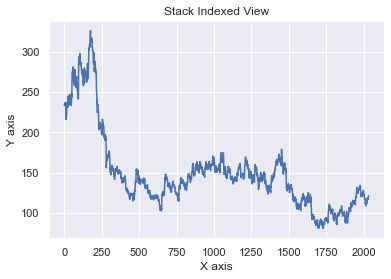

In [12]:
plt.plot(tata_1)
plt.title('Stack Indexed View')
plt.ylabel('Y axis')
plt.xlabel('X axis')

# LSTM Model

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
tata_1=scaler.fit_transform(np.array(tata_1).reshape(-1,1))

In [14]:
tata_1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [15]:
training_size=int(len(tata_1)*0.75)
test_size=len(tata_1)-training_size
train_data,test_data=tata_1[0:training_size,:],tata_1[training_size:len(tata_1),:1]

In [16]:
print(training_size)
print(test_size)
print(train_data,test_data)

1526
509
[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.18831699]
 [0.18811275]
 [0.17034314]] [[0.1621732 ]
 [0.15972222]
 [0.16278595]
 [0.17340686]
 [0.14174837]
 [0.15441176]
 [0.16503268]
 [0.15563725]
 [0.14460784]
 [0.13684641]
 [0.13582516]
 [0.14072712]
 [0.14501634]
 [0.14195261]
 [0.13562092]
 [0.15053105]
 [0.15727124]
 [0.15461601]
 [0.15767974]
 [0.15114379]
 [0.14297386]
 [0.14215686]
 [0.14787582]
 [0.13970588]
 [0.11642157]
 [0.11131536]
 [0.10927288]
 [0.10334967]
 [0.09783497]
 [0.10089869]
 [0.10906863]
 [0.10171569]
 [0.11254085]
 [0.12704248]
 [0.12214052]
 [0.12704248]
 [0.11519608]
 [0.11008987]
 [0.0996732 ]
 [0.09640523]
 [0.10089869]
 [0.10886438]
 [0.10866013]
 [0.1186683 ]
 [0.12316176]
 [0.11029412]
 [0.11703431]
 [0.11008987]
 [0.1064134 ]
 [0.10559641]
 [0.1004902 ]
 [0.10784314]
 [0.10988562]
 [0.09763072]
 [0.09027778]
 [0.1123366 ]
 [0.12867647]
 [0.12071078]
 [0.13031046]
 [0.1439951 ]
 [0.13664216]
 [0.14910131]
 [0.15686275]
 [0.14685458]
 [0.1

In [17]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=101,verbose=1)

Epoch 1/100
15/15 [==============================] - 11s 406ms/step - loss: 0.0307 - val_loss: 0.0025
Epoch 2/100
15/15 [==============================] - 5s 315ms/step - loss: 0.0046 - val_loss: 0.0013
Epoch 3/100
15/15 [==============================] - 5s 340ms/step - loss: 0.0020 - val_loss: 7.4212e-04
Epoch 4/100
15/15 [==============================] - 8s 582ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 5/100
15/15 [==============================] - 8s 502ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 6/100
15/15 [==============================] - 7s 498ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/100
15/15 [==============================] - 7s 467ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 8/100
15/15 [==============================] - 7s 460ms/step - loss: 0.0016 - val_loss: 9.9710e-04
Epoch 9/100
15/15 [==============================] - 7s 446ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 10/100
15/15 [==============================] - 6s 430ms/step - loss: 0.0013

Epoch 77/100
15/15 [==============================] - 7s 455ms/step - loss: 5.0341e-04 - val_loss: 3.3960e-04
Epoch 78/100
15/15 [==============================] - 6s 424ms/step - loss: 4.5090e-04 - val_loss: 6.1718e-04
Epoch 79/100
15/15 [==============================] - 7s 427ms/step - loss: 6.2069e-04 - val_loss: 4.8065e-04
Epoch 80/100
15/15 [==============================] - 6s 412ms/step - loss: 4.1017e-04 - val_loss: 6.4902e-04
Epoch 81/100
15/15 [==============================] - 7s 453ms/step - loss: 4.0404e-04 - val_loss: 5.0512e-04
Epoch 82/100
15/15 [==============================] - 6s 413ms/step - loss: 3.4092e-04 - val_loss: 4.1566e-04
Epoch 83/100
15/15 [==============================] - 6s 408ms/step - loss: 3.1108e-04 - val_loss: 3.9652e-04
Epoch 84/100
15/15 [==============================] - 6s 409ms/step - loss: 3.0754e-04 - val_loss: 3.3230e-04
Epoch 85/100
15/15 [==============================] - 6s 428ms/step - loss: 3.2069e-04 - val_loss: 3.8057e-04
Epoch 86/1

In [24]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [25]:
len(tata_1)

2035

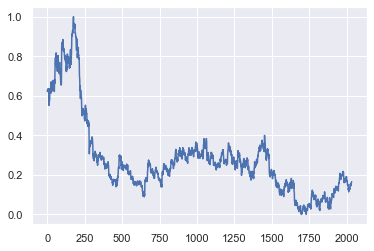

In [26]:
plt.plot(tata_1)

In [27]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

13/13 [==============================] - 0s 34ms/step


In [28]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [29]:
import math
from sklearn.metrics import mean_squared_error

In [30]:
math.sqrt(mean_squared_error(y_train, train_predict))

162.78043732614015

In [31]:
look_back = 100
trainPredictPlot = np.empty_like(tata_1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(tata_1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(tata_1) - 1, :] = test_predict

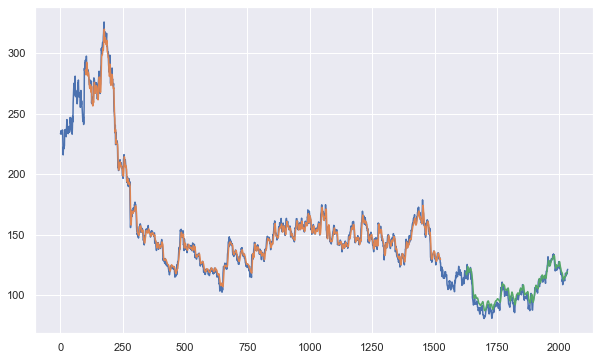

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [32]:
plt.figure(figsize=(10,6))

plt.plot(scaler.inverse_transform(tata_1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")